# 1 

A partir del fichero "US_Crime_Rates_1960_2014", se pide:

1. Tratar el dataset como una serie temporal a partir de la columna Year. Siempre el eje X será el nuevo índice Year.
2. Dibujar todas las columnas numéricas.
3. Como se puede ver en el punto 2, la columna "Population" tiene una magnitud diferente a la de las demás columnas: Dibuja la misma gráfica que antes pero con dos resoluciones diferentes para que se puedan observar con mejor detalle todas las columnas. 
4. A partir de ahora y para el resto del ejercicio, borra las columnas "Population" y "Total" ¿Qué columnas tienen mejor correlación? 
5. A partir de las cinco columnas que tengan mejor correlación con la columna "Murder", entrena un modelo de regresión no lineal a partir de polinomio de grado 6. Este modelo ha de entrenarse siguiendo el esquema recomendado de validación cruzada y almacenando los errores de entrenamiento y validación en cada iteración del entrenamiento.
6. Representa la evolución de los errores de validación y entrenamiento en una gráfica. ¿Ha habido sobreaprendizaje?. Utiliza n_iteraciones=23 y n_repeats=7.

<AxesSubplot:xlabel='Year'>

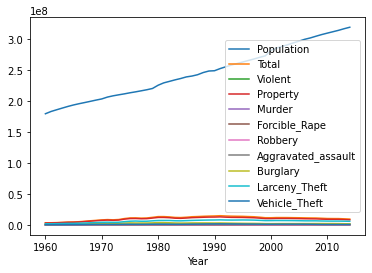

In [1]:
import pandas as pd
df = pd.read_csv("../data/US_Crime_Rates_1960_2014.csv")

df.set_index("Year", inplace=True)
df.plot()

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='Year'>

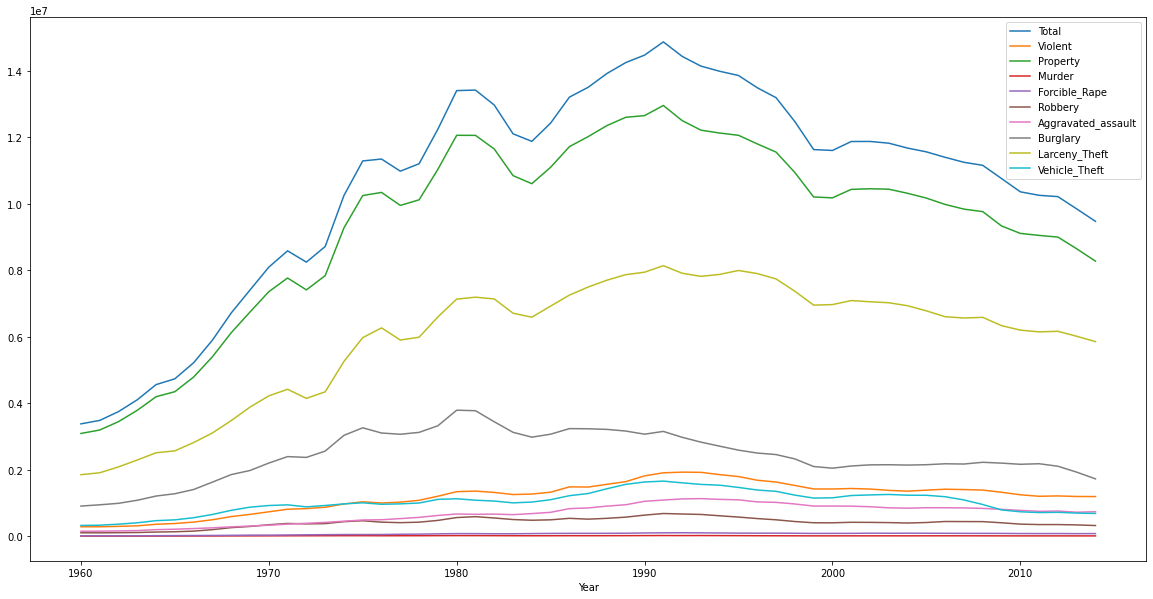

In [3]:
df.drop("Population", axis=1).plot(figsize=(20, 10))

## 3. Visualizar en dos escalas

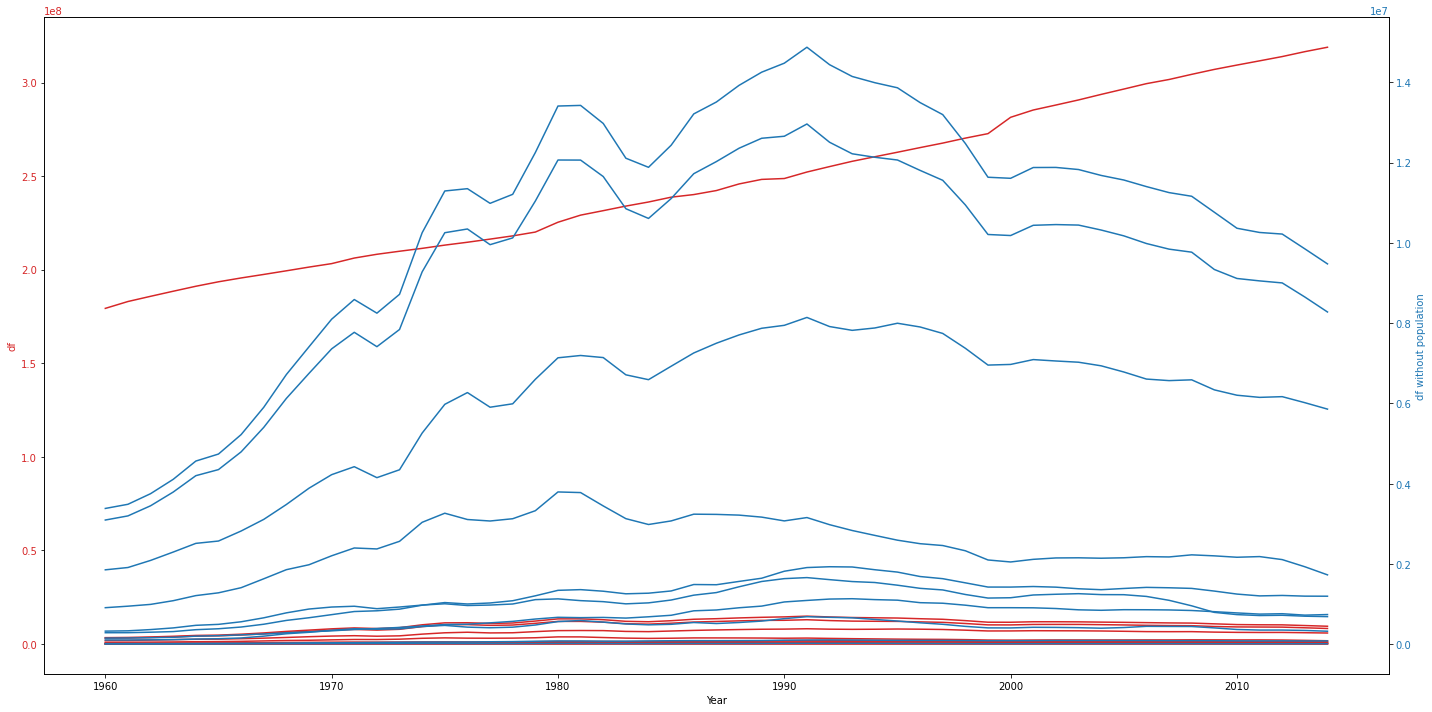

In [4]:
data1 = df
data2 = df.drop("Population", axis=1)


fig, ax1 = plt.subplots(figsize=(20,10))

color = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_ylabel('df', color=color)
ax1.plot(data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  

color = 'tab:blue'
ax2.set_ylabel('df without population', color=color)  
ax2.plot(data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()

### 4. ELIMINAR "POPULATION" Y "TOTAL". CORRELACIONES.

In [5]:
df.drop(["Population", "Total"], axis=1, inplace=True)

<AxesSubplot:>

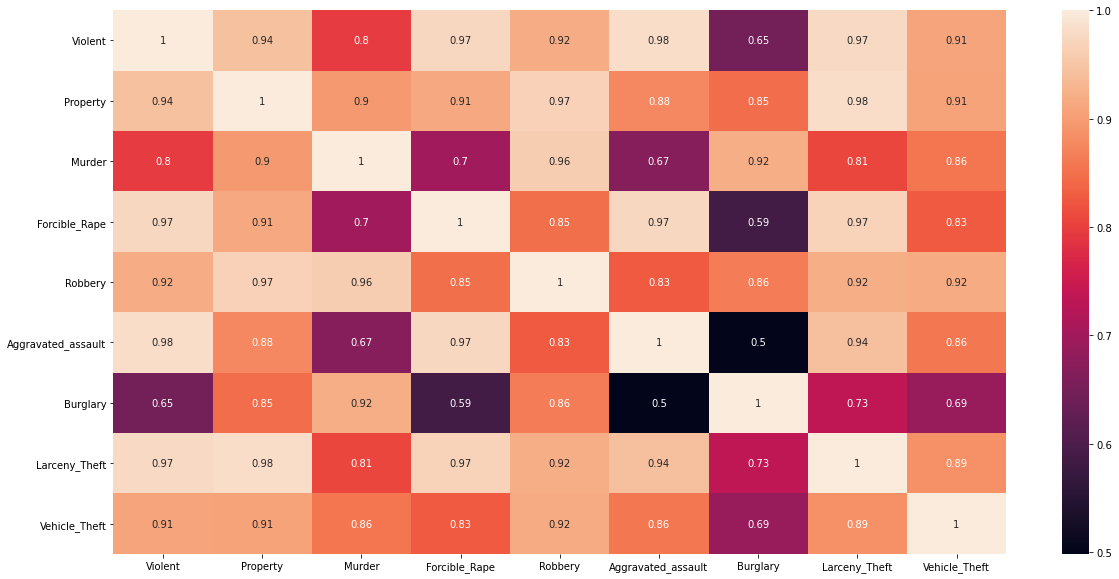

In [6]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True)

## 5. Coger 5 columnas con más correlación. Train, CV. 

In [7]:
import numpy as np

In [8]:
df.corr()["Murder"].sort_values(ascending=False).iloc[1:6]

Robbery          0.960156
Burglary         0.920207
Property         0.895641
Vehicle_Theft    0.856600
Larceny_Theft    0.806279
Name: Murder, dtype: float64

In [9]:
X = np.array(df[["Robbery", "Burglary", "Property", "Vehicle_Theft", "Larceny_Theft"]])
y = np.array(df["Murder"])

### Cross Validation

In [10]:
from sklearn.model_selection import train_test_split 
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold, RepeatedKFold

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [12]:
from sklearn.model_selection import KFold
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from numpy import mean
from numpy import std

degree = 6

polinominal_model = PolynomialFeatures(degree) 
X_poly = polinominal_model.fit_transform(X_train, y_train)
model = LinearRegression()

k_fold = RepeatedKFold(n_splits=23, n_repeats=7, random_state=2)
n_scores = cross_val_score(model, X_poly, y_train, cv=k_fold, n_jobs=-1, scoring="r2")
# report performance
print(n_scores)


[-1.19807457e+02 -8.60960408e+03 -3.27877965e+01 -3.29844798e+02
 -2.07086598e+03 -8.21307001e+01 -4.14790527e+00 -5.00920917e-01
 -3.23699604e+06 -2.32982962e+01 -8.95889394e+01 -3.03034874e+02
 -1.38213599e+01 -4.05792093e+01 -7.04402870e+03 -2.35370605e+02
 -1.96243395e+00 -3.91165943e+04 -3.44625342e+01 -2.79768168e+04
 -3.45095409e+03             nan             nan -8.40559284e+01
 -1.04993242e+02 -7.06995530e+03 -1.57684843e+02  6.29174937e-01
 -4.33146440e-02 -6.15232614e+02  1.97485813e-01 -3.23699604e+06
 -5.34760276e+02 -1.26500639e+02 -1.05151129e+01 -2.59226715e+02
 -7.42391633e+03 -1.88662506e+03 -1.56867673e+03 -5.38671695e+03
 -2.79077940e+05 -2.74015747e-02 -4.80298233e+01 -5.98126711e+02
             nan             nan -7.18044205e+04 -5.67638725e+00
 -4.35685667e+01 -2.98041323e+02  9.54534527e-01 -4.18562489e+01
 -1.22477876e+02 -5.59516630e+05 -1.06311504e+01 -8.65834158e+01
 -4.30065067e+00 -1.81962464e+03 -1.78640896e+02 -9.45380714e+02
 -6.25450546e+02 -7.52850

In [13]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [14]:
val_score = []
train_score = []
mae_traine = []
rmse_traine = []
for i, (train, val) in enumerate(k_fold.split(X_poly)):

    model.fit(X_poly[train], y_train[train])
    score_val = round(model.score(X_poly[val], y_train[val]), 3)
    val_score.append(score_val)
    score_train = model.score(X_poly[train], y_train[train])
    train_score.append(score_train)
    mae_train = mean_absolute_error(y_train[train], model.predict(X_poly[train]))
    mae_traine.append(mae_train)
    rmse_train = np.sqrt(mean_squared_error(y_train[train], model.predict(X_poly[train])))
    rmse_traine.append(rmse_train)
    print("score_train:", score_train)
    print("score_val:", score_val)
    print("train_mae:", mae_train)
    print("train_rmse:", rmse_train)
    print("-------------------------------------------------")


----------------------------------
score_train: 1.0
score_val: -122.478
train_mae: 9.38920909123096e-06
train_rmse: 1.3688571539866288e-05
-------------------------------------------------
score_train: 0.9999999999999999
score_val: -559516.63
train_mae: 3.5861574967081346e-05
train_rmse: 3.7133754944418535e-05
-------------------------------------------------
score_train: 1.0
score_val: -10.631
train_mae: 1.2081681710523775e-05
train_rmse: 1.380416282750892e-05
-------------------------------------------------
score_train: 1.0
score_val: -86.583
train_mae: 1.020229510253384e-05
train_rmse: 1.620766408382142e-05
-------------------------------------------------
score_train: 1.0
score_val: -4.301
train_mae: 1.3217947049443388e-05
train_rmse: 1.7026420897751672e-05
-------------------------------------------------
score_train: 1.0
score_val: -1819.625
train_mae: 7.331464682162429e-06
train_rmse: 9.986821572619756e-06
-------------------------------------------------
score_train: 0.9999999

In [15]:
print(val_score)
len(val_score)

[-119.807, -8609.604, -32.788, -329.845, -2070.866, -82.131, -4.148, -0.501, -3236996.037, -23.298, -89.589, -303.035, -13.821, -40.579, -7044.029, -235.371, -1.962, -39116.594, -34.463, -27976.817, -3450.954, nan, nan, -84.056, -104.993, -7069.955, -157.685, 0.629, -0.043, -615.233, 0.197, -3236996.037, -534.76, -126.501, -10.515, -259.227, -7423.916, -1886.625, -1568.677, -5386.717, -279077.94, -0.027, -48.03, -598.127, nan, nan, -71804.421, -5.676, -43.569, -298.041, 0.955, -41.856, -122.478, -559516.63, -10.631, -86.583, -4.301, -1819.625, -178.641, -945.381, -625.451, -752.851, -0.088, -763.416, -201.628, -34.847, -7860.862, nan, nan, -10.155, -0.669, -516.436, -55.658, -227.622, -34.802, -106706.05, -159.102, -9.281, -133.001, -6198.598, -41.341, -113.112, -926.787, -0.541, -43731.614, -13328801.252, -8381.535, -247.897, -34.847, -753.339, nan, nan, -39386.094, -2.496, -16517.131, -3508.611, -122.478, -3633.78, -6.895, 0.766, -1388.162, -41.341, -2411.051, -9.794, -3.513, -2196.1

161

In [16]:
print(train_score)
len(train_score)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9999999999999999, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9999999999999999, 1.0, 1.0, 1.0, 0.9999999999999999, 1.0, 0.9999999999999999, 0.9999999999999999, 0.9999999999999999, 0.9999999999999999, 1.0, 1.0, 1.0, 1.0, 0.9999999999999998, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9999999999999999, 1.0, 1.0, 1.0, 1.0, 0.9999999999999999, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9999999999999999, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9999999999999999, 1.0, 1.0, 1.0, 0.9999999999999999, 0.9999999999999999, 1.0, 1.0, 0.9999999999999999, 1.0, 1.0, 1.0, 1.0, 0.9999999999999999, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9999999999999998, 0.9999999999999999, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9999999999999998, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9999999999999999, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9999999999999999, 1.0, 1.0, 0.9999999999999999, 1.0, 0.9999999999999999, 1.0, 1.0, 1.0, 1.0, 1.0,

161

In [17]:
print(len(n_scores))

161


## 6. Evolución de los errores

In [18]:
from sklearn.metrics import mean_absolute_error

In [19]:
import itertools
lst = range(1,8)
epoca = list(itertools.chain.from_iterable(itertools.repeat(x, 23) for x in lst))
len(epoca)

161

In [20]:
numbers = list(range(1, 24))
iterations = []
for x in range(7):
    iterations.extend(numbers)

print(iterations)
print(len(iterations))


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
161


In [21]:
mae_val = cross_val_score(model, X_poly, y_train, cv=k_fold, scoring="neg_mean_absolute_error", n_jobs=-1)

In [22]:
mae_val = abs(mae_val)

In [23]:
rmse_val = cross_val_score(model, X_poly, y_train, cv=k_fold, scoring='neg_root_mean_squared_error', n_jobs=-1)
rmse_val = abs(rmse_val )

In [24]:
errors = pd.DataFrame({"epoca": epoca, "iterations":iterations,  "rmse_val": rmse_val, "rmse_train": rmse_traine})
errors

,epoca,iterations,rmse_val,rmse_train
0,1,1,43585.780303,0.000011
1,1,2,367090.455743,0.000010
2,1,3,13107.699644,0.000022
3,1,4,61833.979913,0.000017
4,1,5,50752.296366,0.000013
...,...,...,...,...
156,7,19,16511.544434,0.000038
157,7,20,71122.737256,0.000018
158,7,21,35513.067030,0.000011
159,7,22,90640.722743,0.000033


In [25]:
def plot(n):
    e1 = errors[errors["epoca"] == n]
    e1 = e1.set_index("iterations", drop=True)
    e1.drop("epoca", axis=1, inplace=True)
    
    e1.plot(figsize=(20,10))


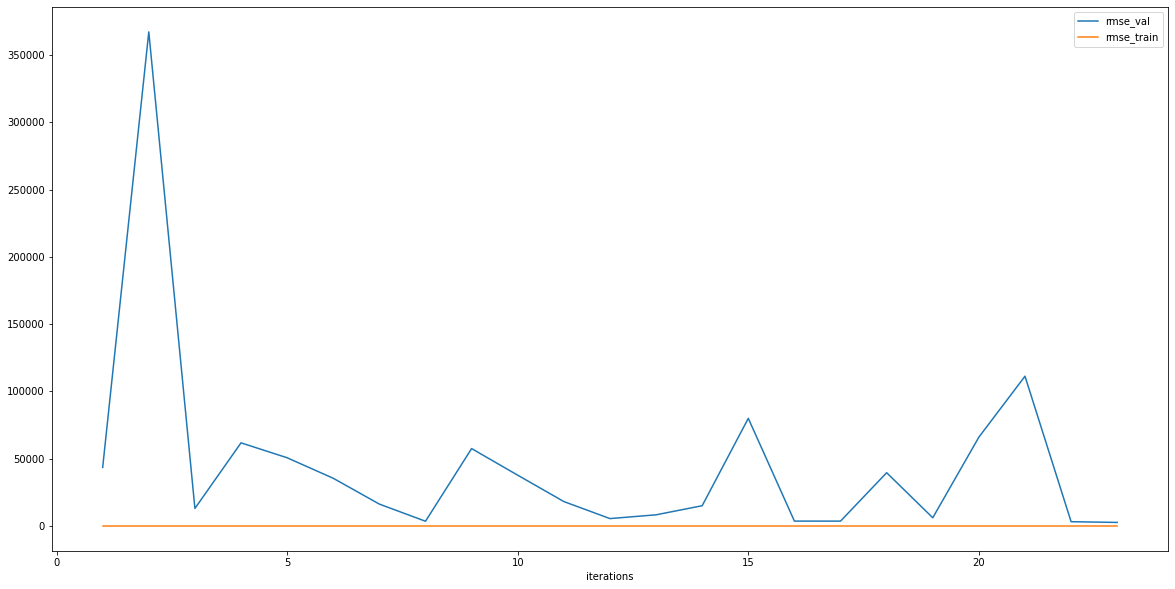

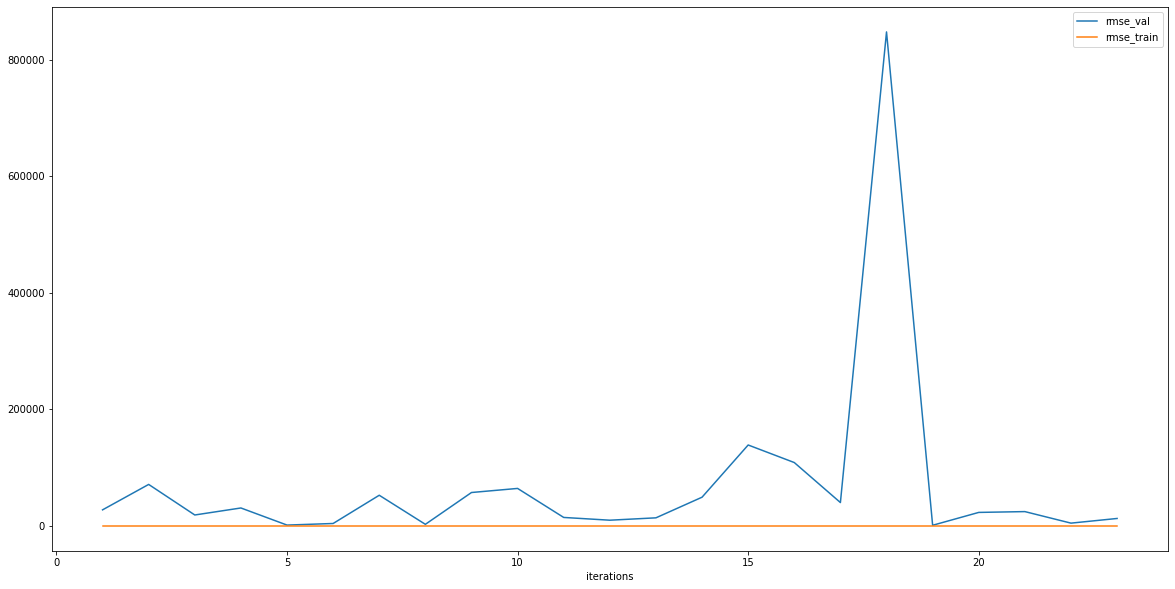

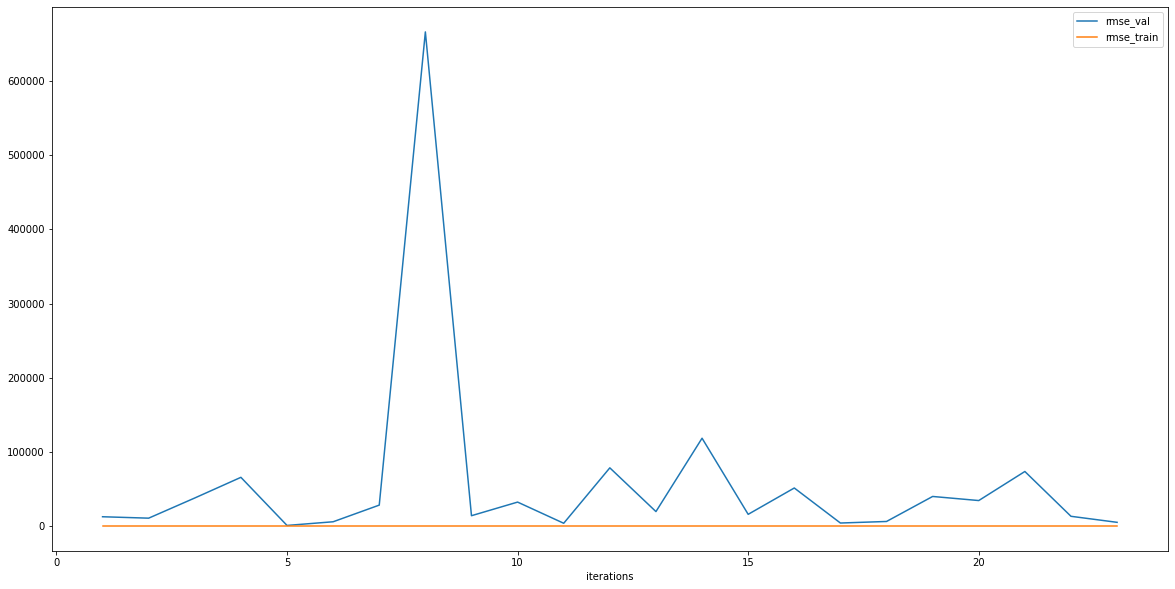

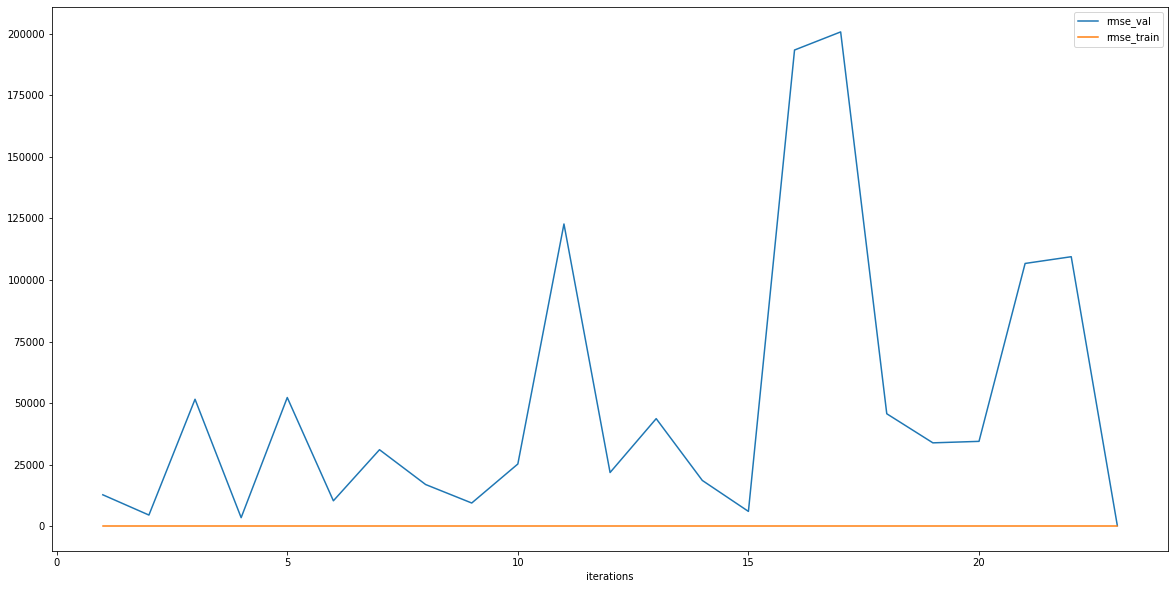

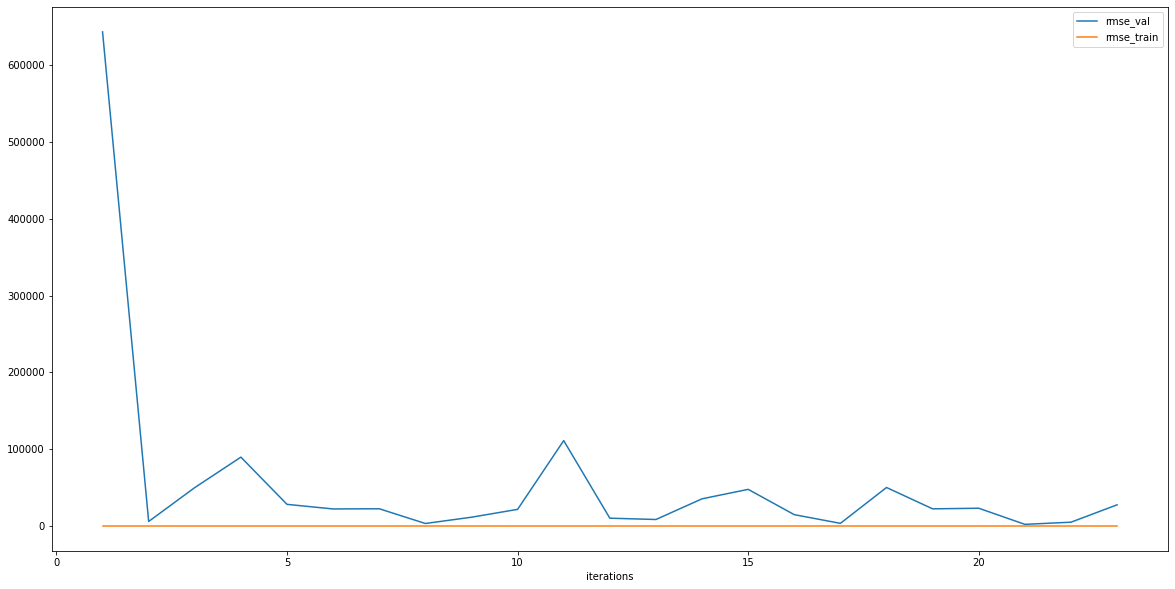

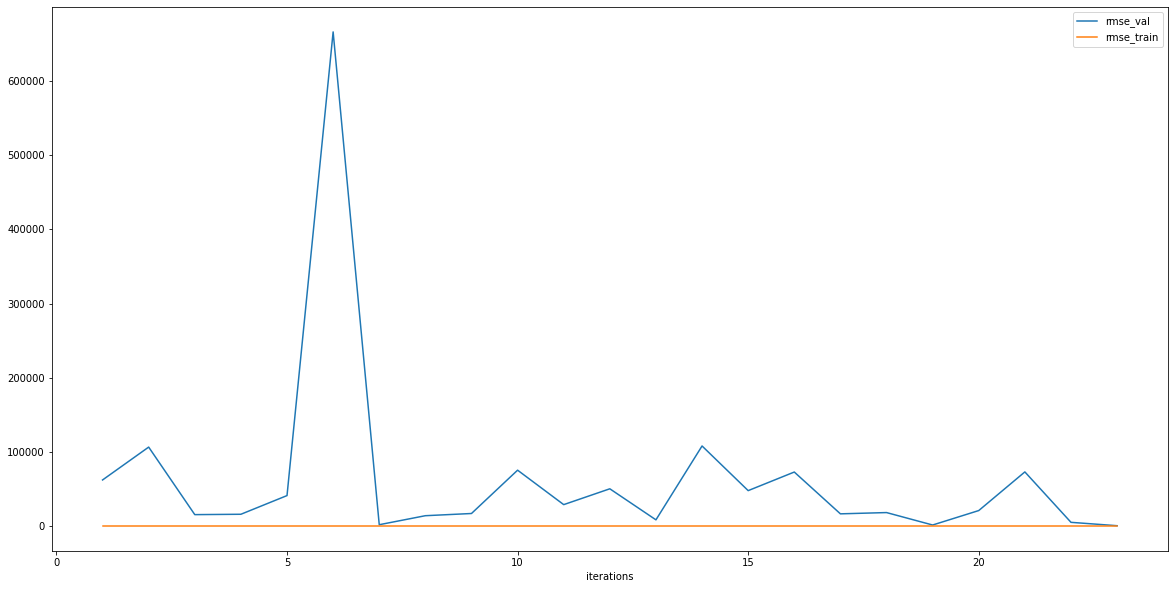

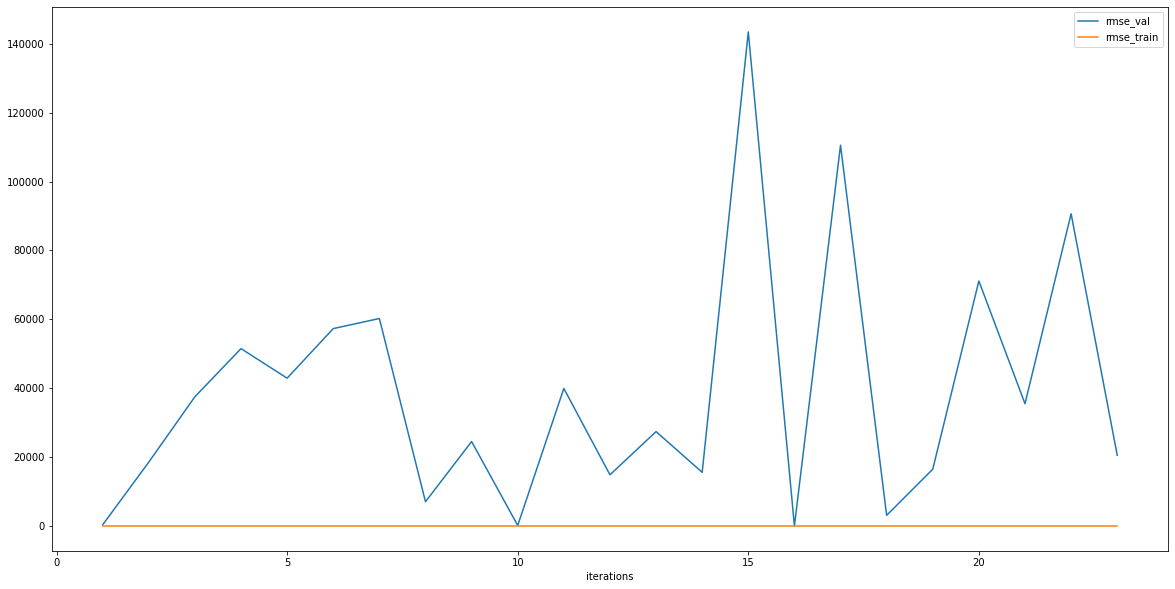

In [26]:
for i in range(1, 8):
    plot(i)

In [28]:
errors = errors.set_index(["epoca", "iterations"])

In [29]:
errors

rmse_val  rmse_train
epoca iterations                           
1     1            43585.780303    0.000011
      2           367090.455743    0.000010
      3            13107.699644    0.000022
      4            61833.979913    0.000017
      5            50752.296366    0.000013
...                         ...         ...
7     19           16511.544434    0.000038
      20           71122.737256    0.000018
      21           35513.067030    0.000011
      22           90640.722743    0.000033
      23           20565.392941    0.000032

[161 rows x 2 columns]

<AxesSubplot:xlabel='epoca,iterations'>

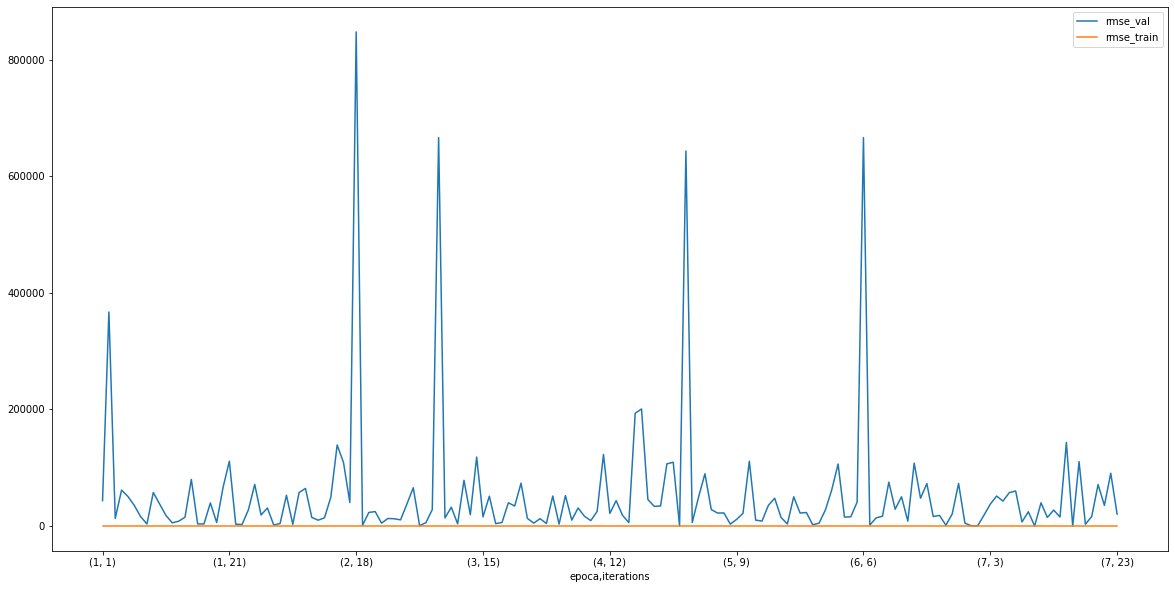

In [30]:
errors.plot(figsize=(20,10))

In [47]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

Sí, el modelo está sobreentrenado, ya que en train nos da un error de prácticamente 0 pero en el cross validation nos da errores muy grandes.